In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
sns.set(style="whitegrid")

In [4]:
df = pd.read_csv("../data/german_credit_data.csv")

In [5]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# --- Missing values handling ---

df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [8]:
df['Saving accounts'].isna().mean()


np.float64(0.183)

In [9]:
df.groupby(df['Saving accounts'].isna())['Risk'].value_counts(normalize=True)

Saving accounts  Risk
False            good    0.671971
                 bad     0.328029
True             good    0.825137
                 bad     0.174863
Name: proportion, dtype: float64

In [10]:
df['Checking account'].isna().mean()

np.float64(0.394)

In [11]:
df.groupby(df['Checking account'].isna())['Risk'].value_counts(normalize=True)

Checking account  Risk
False             good    0.580858
                  bad     0.419142
True              good    0.883249
                  bad     0.116751
Name: proportion, dtype: float64

In [12]:
df.duplicated().sum()

np.int64(0)

We observed missing values in 'Saving accounts' and 'Checking account'.
Dropping rows with NaNs (dropna) would remove a non-trivial share of applicants and may introduce selection bias
if missingness is not random. Therefore, we keep all observations and treat missingness as an explicit category.

In [13]:
df['Saving accounts'] = df['Saving accounts'].fillna('unknown')
df['Checking account'] = df['Checking account'].fillna('unknown')

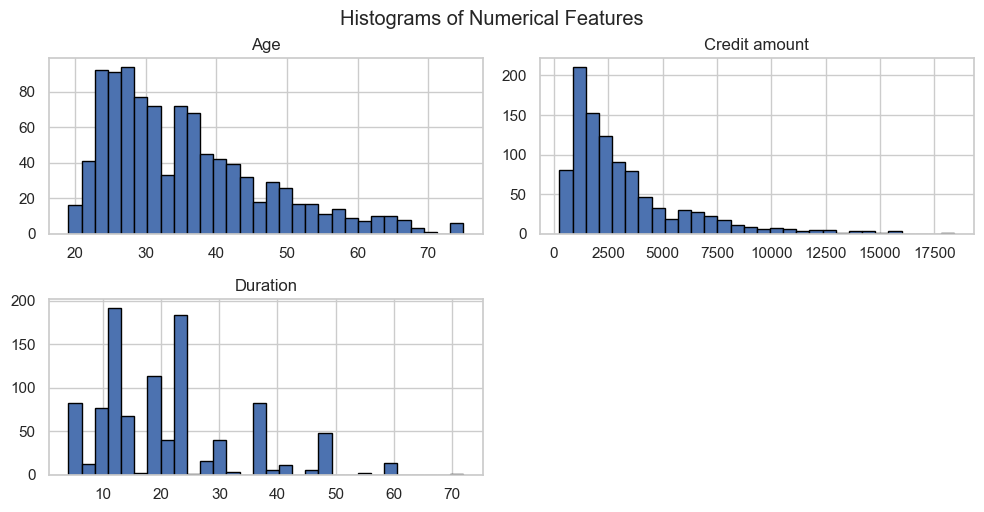

In [14]:
# --- Distribution analysis of numerical features ---

df[['Age', 'Credit amount', 'Duration']].hist(bins=30, figsize=(10, 5), edgecolor='black')
plt.tight_layout()
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.show()

Age appears moderately distributed with a slight right skew but no extreme outliers.
Credit amount shows a strong right-skewed distribution with a long tail, which is typical in credit datasets where large loans are less frequent.
Duration exhibits discrete peaks (e.g., 12, 24, 36 months), suggesting standardized loan terms rather than a continuous distribution.


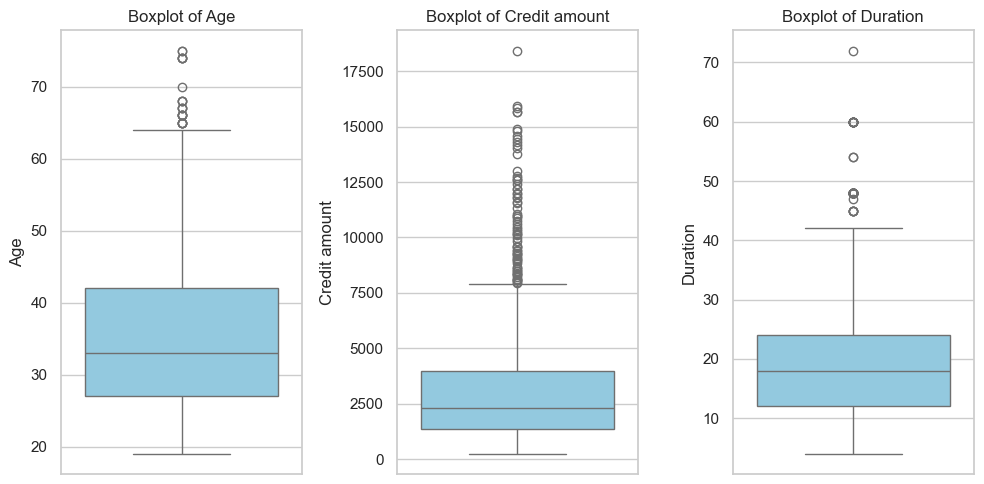

In [15]:
# --- Outlier and dispersion analysis using boxplots ---

plt.figure(figsize=(10, 5))
for i, col in enumerate(['Age', 'Credit amount', 'Duration']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Age looks fairly stable with a few plausible high-age outliers.
Credit amount is strongly right-skewed with many high-value outliers (common in lending), suggesting a potential log transform.
Duration shows standard loan-term clusters with a few long-term outliers.

In [16]:
df.query("Duration >= 60")

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
29,29,63,male,2,own,little,little,6836,60,business,bad
134,134,21,female,2,own,moderate,unknown,10144,60,radio/TV,good
255,255,27,male,1,own,unknown,moderate,7418,60,radio/TV,good
332,332,24,female,3,own,moderate,moderate,7408,60,car,bad
373,373,63,male,3,free,unknown,unknown,13756,60,car,good
374,374,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
616,616,27,male,3,free,unknown,moderate,9157,60,radio/TV,good
637,637,21,male,2,own,little,unknown,15653,60,radio/TV,good
672,672,42,male,3,own,little,unknown,10366,60,car,good
677,677,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad


In [17]:
df.query("Duration >= 60")['Risk'].value_counts(normalize=True)

Risk
bad     0.5
good    0.5
Name: proportion, dtype: float64

Countplots for categorical features help assess class balance and detect rare categories.
This is useful to anticipate encoding (one-hot) and decide whether to group infrequent levels.

In [18]:
categorical_cols= ["Sex", "Job", "Housing", "Saving accounts", "Checking account", "Purpose"]

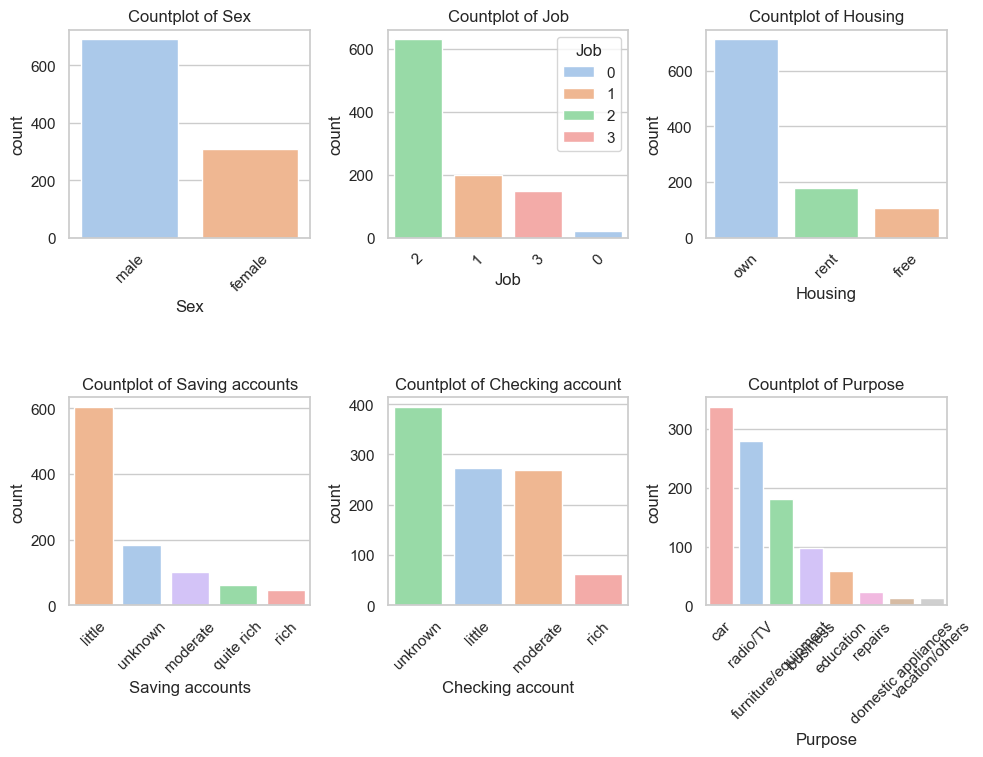

In [19]:
plt.figure(figsize=(10, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=col, hue=col, order=df[col].value_counts().index, palette='pastel')
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Some categories (e.g., male, job level 2, housing = own) dominate the portfolio, while others are relatively rare.

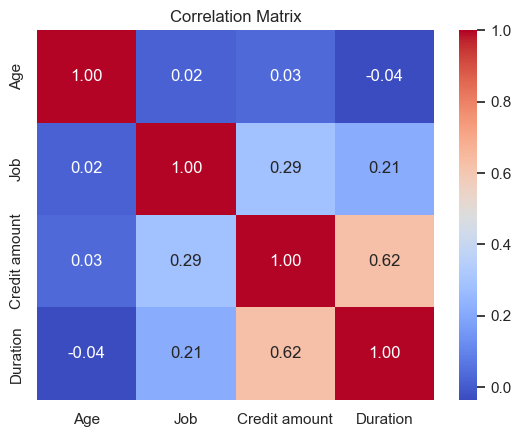

In [20]:
# --- Correlation analysis ---

corr = df[["Age","Job","Credit amount","Duration"]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Age shows near-zero correlation with other numerical variables, suggesting it provides independent predictive information.
The strongest relationship is observed between Credit amount and Duration (0.62), which is economically intuitive as larger loans tend to have longer maturities.
No extreme multicollinearity is detected at this stage.

In [21]:
df.groupby("Job")["Credit amount"].mean()

Job
0    2745.136364
1    2358.520000
2    3070.965079
3    5435.493243
Name: Credit amount, dtype: float64

In [22]:
df.groupby("Sex")["Credit amount"].mean()

Sex
female    2877.774194
male      3448.040580
Name: Credit amount, dtype: float64

Group-level analysis shows that higher job categories are associated with larger average loan amounts, which is economically intuitive. 

In [23]:
# --- Pivot table analysis ---

pd.pivot_table(df, values='Credit amount', index='Housing', columns = "Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4931.800000,5834.181818,NaN,4387.266667,4100.181818,2417.333333,2750.666667,7227.250
own,3800.592105,3329.949772,1546.5,2198.647059,3107.459016,2540.493392,2866.000000,8700.375
rent,5614.125000,3487.968254,1255.5,2931.000000,2727.354167,2199.763158,1522.000000,NaN


A pivot table is used to examine how average loan amounts vary across combinations of Housing type and Loan Purpose.
This helps identify interaction effects between borrower profile and credit usage.

Text(0.5, 1.0, 'Credit amount vs Age colored by Sex and sized by Duration')

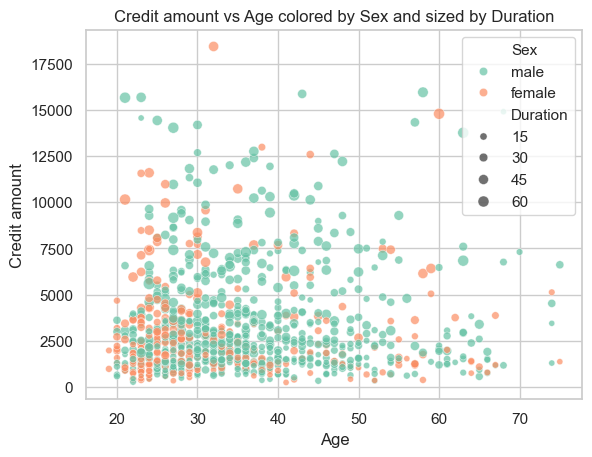

In [24]:
# --- Scatter plot analysis ---

sns.scatterplot(data=df, x='Age', y='Credit amount', hue='Sex',size = "Duration", alpha=0.7, palette='Set2')
plt.title("Credit amount vs Age colored by Sex and sized by Duration")

The scatterplot confirms the weak linear relationship between Age and Credit amount.
Larger loan amounts are generally associated with longer durations, while no strong separation is observed across gender.
This suggests that Duration plays a more significant role in credit exposure than Age or Sex.

Text(0.5, 1.0, 'Credit Amount Distribution by Saving Accounts')

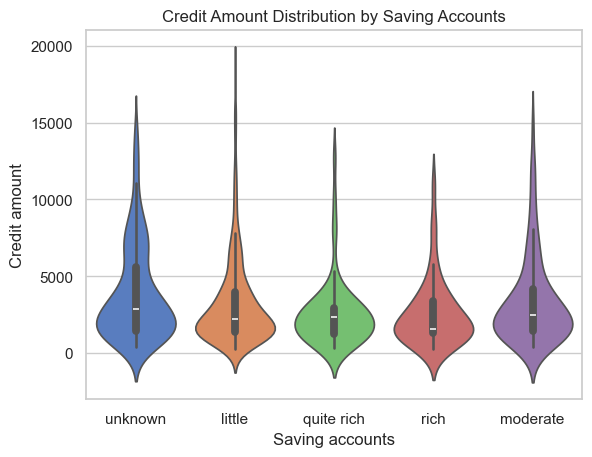

In [25]:
# --- Violin plot analysis ---

sns.violinplot(
    data=df,
    x='Saving accounts',
    y='Credit amount',
    hue='Saving accounts',
    palette='muted',
    legend=False
)
plt.title("Credit Amount Distribution by Saving Accounts")

The violin plot shows that credit amounts vary across saving account categories, with moderate savers tending to exhibit slightly higher loan amounts.
However, distributions largely overlap, indicating no sharp segmentation.

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_38192\296716588.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Risk", y =col, palette='Set3')
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_38192\296716588.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Risk", y =col, palette='Set3')
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_38192\296716588.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Risk", y =col, palette='Set3')


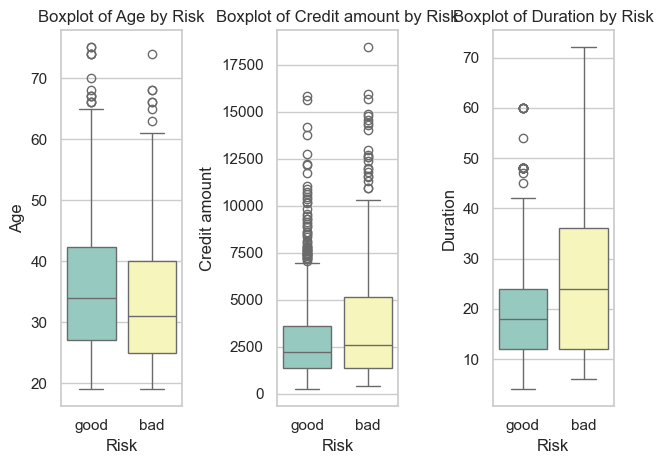

In [26]:
# --- Boxplot analysis by Risk category ---

for i, col in enumerate(['Age', 'Credit amount', 'Duration']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x="Risk", y =col, palette='Set3')
    plt.title(f'Boxplot of {col} by Risk')
plt.tight_layout()
plt.show()

Duration appears to be the most discriminative numerical feature, with longer loans associated with higher default risk.
Credit amount shows a moderate positive relationship with default, while Age exhibits a slight inverse effect.
However, substantial overlap suggests that predictive power will come from combining features.


In [27]:
df.groupby('Risk')[["Age", "Credit amount","Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,33.963333,3938.126667,24.860000
good,36.224286,2985.457143,19.207143


<function matplotlib.pyplot.show(close=None, block=None)>

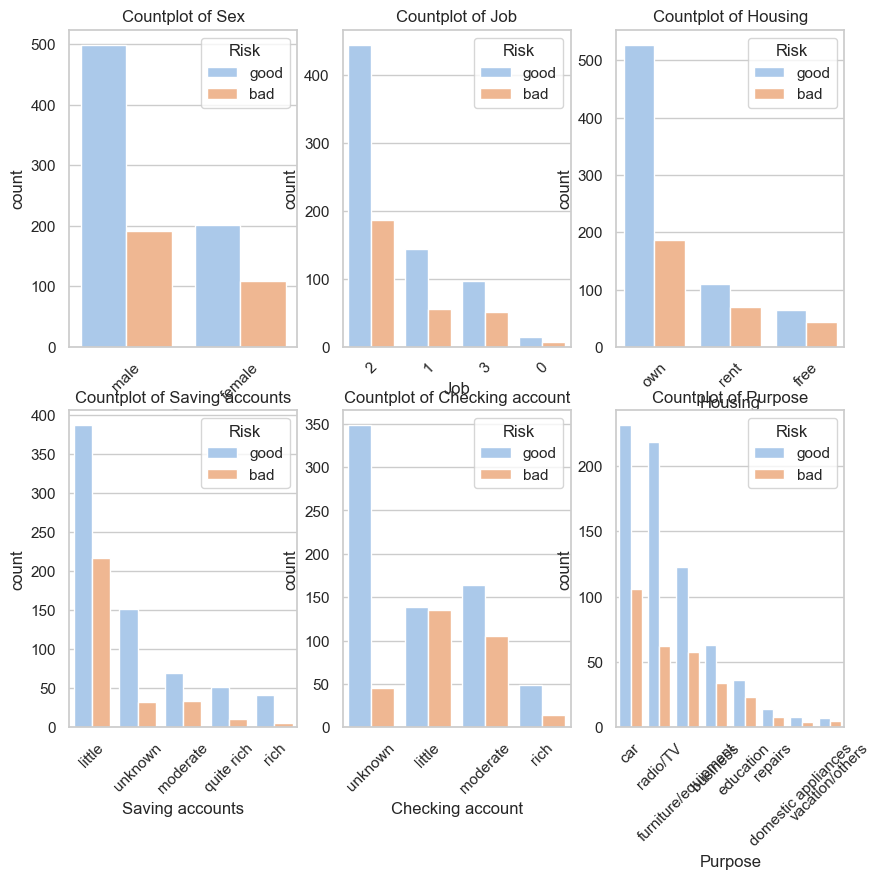

In [28]:
plt.figure(figsize=(10,14))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=col, hue = "Risk", palette='pastel', order=df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout
plt.show

In [29]:
df["Risk"].value_counts(normalize=True)

Risk
good    0.7
bad     0.3
Name: proportion, dtype: float64

The target variable is moderately imbalanced (70% good, 30% bad).
Accuracy alone would be misleading; therefore, evaluation will focus on recall, precision, and ROC-AUC to properly assess default detection.


# Feature Engineering

In [30]:
features = ["Age", "Sex", "Job","Housing","Saving accounts","Checking account","Credit amount","Duration"]

In [31]:
target = "Risk"

In [32]:
df_model = df[features + [target]].copy()

In [33]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,67,male,2,own,unknown,little,1169,6,good
1,22,female,2,own,little,moderate,5951,48,bad
2,49,male,1,own,little,unknown,2096,12,good
3,45,male,2,free,little,little,7882,42,good
4,53,male,2,free,little,little,4870,24,bad


In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [35]:
X = df_model.drop(target, axis=1)
y = df_model[target]

In [36]:
numeric_features = ["Age", "Job", "Credit amount", "Duration"]
categorical_features = ["Sex", "Housing", "Saving accounts", "Checking account"]

In [37]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

Numerical features are imputed using the median to handle skewed distributions.
Categorical features are imputed with the most frequent value and one-hot encoded to convert them into a machine-learning compatible format.


In [38]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [39]:
le_target = LabelEncoder()

In [40]:
y_encoded = le_target.fit_transform(y)

In [41]:
y_encoded

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=1, stratify=y_encoded)

In [44]:
X_train.shape

(800, 8)

In [45]:
X_test.shape

(200, 8)

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [47]:
def train_model(model, param_grid, X_train, y_train, X_test, y_test, preprocessor):
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    grid= GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return best_model,accuracy, grid.best_params_

Define a reusable training function that integrates preprocessing,hyperparameter tuning (GridSearchCV), and model evaluation.
This ensures a clean and leak-free modeling workflow.


In [48]:
# Decision Tree Classifier

dt= DecisionTreeClassifier(random_state=1, class_weight='balanced')
dt_param_grid = {
    "classifier__max_depth": [3, 5, 7, 10, None],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4]
}

In [49]:
best_dt, accuracy_dt, params_dt = train_model(dt, dt_param_grid, X_train, y_train, X_test, y_test,preprocessor)

In [50]:
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.745


In [51]:
print("Best Parameters:", params_dt)

Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}


In [52]:
# Random Forest Classifier

dt= RandomForestClassifier(random_state=1, class_weight='balanced', n_jobs=-1)
rt_param_grid = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [5, 7, 10, None],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4]
}

In [53]:
best_rf, accuracy_rf, params_rf = train_model(dt, rt_param_grid, X_train, y_train, X_test, y_test,preprocessor)

In [54]:
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.75


In [55]:
print("Best parameters:", params_rf)

Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}


In [56]:
# Extra Trees Classifier

et = ExtraTreesClassifier(random_state=1, class_weight='balanced', n_jobs=-1)
et_param_grid = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [5, 7, 10, None],
    "classifier__min_samples_split": [2, 5, 10],
 
 #   "classifier__min_samples_leaf": [1, 2, 4]
}

In [57]:
best_et, accuracy_et, params_et = train_model(et, et_param_grid, X_train, y_train, X_test, y_test,preprocessor)

In [58]:
print("Extra Trees Accuracy:", accuracy_et)

Extra Trees Accuracy: 0.73


In [59]:
# XGBoost Classifier

xgb = XGBClassifier(random_state=1, scale_pos_weight= (y_train == 0).sum() / (y_train == 1).sum(), use_label_encoder=False, eval_metric='logloss')
xgb_param_grid = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [3, 5, 7],
    "classifier__learning_rate": [0.01, 0.1, 0.2],
    "classifier__subsample": [0.7, 0.8, 1.0],
    "classifier__colsample_bytree": [0.7, 1.0]
}

In [60]:
best_xgb, accuracy_xgb, params_xgb = train_model(xgb, xgb_param_grid, X_train, y_train, X_test, y_test,preprocessor)

c:\Users\Utilisateur\Dropbox\Timo\Scolaire_Timo\Audencia\Credit_Risk_Model\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:03:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [61]:
print("XGBoost Accuracy:", accuracy_xgb)

XGBoost Accuracy: 0.765


In [62]:
print("Best params:", params_xgb)

Best params: {'classifier__colsample_bytree': 0.7, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 7, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}


In [63]:
results = [
    ("DecisionTree", best_dt, accuracy_dt),
    ("ExtraTrees", best_et, accuracy_et),
    ("RandomForest", best_rf, accuracy_rf),
    ("XGBoost", best_xgb, accuracy_xgb),
]

best_name, best_model, best_acc = max(results, key=lambda x: x[2])
print("Best model:", best_name, "Accuracy:", best_acc)

Best model: XGBoost Accuracy: 0.765


Among the tested models, XGBoost achieved the highest accuracy (76.5%).
However, further evaluation using ROC-AUC and recall for the 'bad' class is necessary due to class imbalance considerations.


In [64]:
import numpy as np
from sklearn.metrics import (
    confusion_matrix, classification_report,
    precision_score, recall_score, f1_score, accuracy_score,
    roc_auc_score
)

In [65]:
BAD_LABEL = int(np.where(le_target.classes_ == "bad")[0][0])

In [66]:
def evaluate_model_on_test(name, model, X_test, y_test, BAD_LABEL):
    """
    Evaluate a fitted pipeline model on the test set.
    Assumes y_test contains the original encoded labels (e.g., 0/1 from LabelEncoder).
    """
    y_pred = model.predict(X_test)

    # BAD=1 view for "bad" class metrics
    y_test_bad = (y_test == BAD_LABEL).astype(int)
    y_pred_bad = (y_pred == BAD_LABEL).astype(int)

    # Probability of BAD class (needed for ROC-AUC)
    proba_bad = model.predict_proba(X_test)[:, BAD_LABEL]
    auc = roc_auc_score(y_test_bad, proba_bad)

    return {
        "model": name,
        "accuracy": accuracy_score(y_test, y_pred),
        "precision_bad": precision_score(y_test_bad, y_pred_bad, zero_division=0),
        "recall_bad": recall_score(y_test_bad, y_pred_bad, zero_division=0),
        "f1_bad": f1_score(y_test_bad, y_pred_bad, zero_division=0),
        "roc_auc": auc
    }

In [67]:
models = [
    ("DecisionTree", best_dt),
    ("ExtraTrees", best_et),
    ("RandomForest", best_rf),
    ("XGBoost", best_xgb),
]

In [68]:
# --- Evaluate all models on the SAME test set ---

rows = [evaluate_model_on_test(name, m, X_test, y_test, BAD_LABEL) for name, m in models]
results_df = pd.DataFrame(rows).sort_values(["roc_auc", "f1_bad"], ascending=False)

print("Model comparison on TEST set (sorted by ROC-AUC, then F1_BAD):")
print(results_df)

Model comparison on TEST set (sorted by ROC-AUC, then F1_BAD):
          model  accuracy  precision_bad  recall_bad    f1_bad   roc_auc
3       XGBoost     0.765       0.618182    0.566667  0.591304  0.765595
2  RandomForest     0.750       0.638889    0.383333  0.479167  0.755952
1    ExtraTrees     0.730       0.565217    0.433333  0.490566  0.730536
0  DecisionTree     0.745       0.573770    0.583333  0.578512  0.695476


In [69]:
# --- Select best model by ROC-AUC (tie-breaker: F1_BAD) ---
best_name = results_df.iloc[0]["model"]
best_model = dict(models)[best_name]
print("\nSelected best model:", best_name)


Selected best model: XGBoost


In [70]:
# --- Detailed report for the selected best model ---

y_pred = best_model.predict(X_test)
y_test_bad = (y_test == BAD_LABEL).astype(int)
y_pred_bad = (y_pred == BAD_LABEL).astype(int)

print("\nBest model:", best_name)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion matrix (BAD=1):\n", confusion_matrix(y_test_bad, y_pred_bad))
print("\nPrecision (BAD):", precision_score(y_test_bad, y_pred_bad, zero_division=0))
print("Recall (BAD):", recall_score(y_test_bad, y_pred_bad, zero_division=0))
print("F1 (BAD):", f1_score(y_test_bad, y_pred_bad, zero_division=0))

proba_bad = best_model.predict_proba(X_test)[:, BAD_LABEL]
print("\nROC-AUC (BAD as positive):", roc_auc_score(y_test_bad, proba_bad))

print("\nClassification report (BAD=1):\n", classification_report(y_test_bad, y_pred_bad, zero_division=0))


Best model: XGBoost
Accuracy: 0.765

Confusion matrix (BAD=1):
 [[119  21]
 [ 26  34]]

Precision (BAD): 0.6181818181818182
Recall (BAD): 0.5666666666666667
F1 (BAD): 0.591304347826087

ROC-AUC (BAD as positive): 0.7655952380952381

Classification report (BAD=1):
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       140
           1       0.62      0.57      0.59        60

    accuracy                           0.77       200
   macro avg       0.72      0.71      0.71       200
weighted avg       0.76      0.77      0.76       200



In [71]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# --- Threshold tuning on the selected best model ---
threshold = 0.30
y_pred_bad_t = (proba_bad >= threshold).astype(int)

print("\nThreshold:", threshold)
print("Confusion matrix:\n", confusion_matrix(y_test_bad, y_pred_bad_t))
print("Precision (BAD):", precision_score(y_test_bad, y_pred_bad_t, zero_division=0))
print("Recall (BAD):", recall_score(y_test_bad, y_pred_bad_t, zero_division=0))
print("F1 (BAD):", f1_score(y_test_bad, y_pred_bad_t, zero_division=0))


Threshold: 0.3
Confusion matrix:
 [[103  37]
 [ 21  39]]
Precision (BAD): 0.5131578947368421
Recall (BAD): 0.65
F1 (BAD): 0.5735294117647058


In [72]:
# --- Find a threshold that maximizes recall subject to a minimum precision ---

best = {"t": None, "recall": -1, "precision": None}

for t in np.linspace(0.05, 0.95, 19):
    pred = (proba_bad >= t).astype(int)
    prec = precision_score(y_test_bad, pred, zero_division=0)
    rec = recall_score(y_test_bad, pred, zero_division=0)

    # Minimum precision constraint (adjust as you like)
    if prec >= 0.40 and rec > best["recall"]:
        best = {"t": float(t), "recall": float(rec), "precision": float(prec)}

print("\nBest threshold under precision>=0.40 constraint:", best)


Best threshold under precision>=0.40 constraint: {'t': 0.1, 'recall': 0.8333333333333334, 'precision': 0.43859649122807015}


In [73]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# y_bad: BAD=1, GOOD=0
y_bad = (y_encoded == BAD_LABEL).astype(int)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

scoring = {
    "accuracy": "accuracy",
    "roc_auc": "roc_auc",
    "precision_bad": make_scorer(precision_score, pos_label=1, zero_division=0),
    "recall_bad": make_scorer(recall_score, pos_label=1, zero_division=0),
    "f1_bad": make_scorer(f1_score, pos_label=1, zero_division=0),
}

cv_results = cross_validate(
    best_model, X, y_bad,
    cv=cv,
    scoring=scoring,
    return_train_score=False
)

print("\nCross-validation results (mean ± std):")
for k, v in cv_results.items():
    if k.startswith("test_"):
        print(k, "mean=", v.mean(), "std=", v.std())


c:\Users\Utilisateur\Dropbox\Timo\Scolaire_Timo\Audencia\Credit_Risk_Model\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:03:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Utilisateur\Dropbox\Timo\Scolaire_Timo\Audencia\Credit_Risk_Model\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:03:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Utilisateur\Dropbox\Timo\Scolaire_Timo\Audencia\Credit_Risk_Model\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:03:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Utilisateur\Dropbox\Timo\Scolaire_Timo\Audencia\Cred


Cross-validation results (mean ± std):
test_accuracy mean= 0.735 std= 0.017606816861659026
test_roc_auc mean= 0.7277142857142856 std= 0.012298811770860464
test_precision_bad mean= 0.5978977482465855 std= 0.055708539328428765
test_recall_bad mean= 0.38 std= 0.02867441755680877
test_f1_bad mean= 0.4623433989504505 std= 0.021635812882614312


In [74]:
import joblib
joblib.dump(best_model, "Credit_risk_pipeline.pkl")

['Credit_risk_pipeline.pkl']